# Social Media : Youtube
# ( Youtube Trending Videos Statistics )

* YouTube is an American video-sharing website headquartered in San Bruno, California. 
* The service was created by three former PayPal employees—Chad Hurley, Steve Chen, and Jawed Karim—in February 2005. 
* Google bought the site in November 2006 for US$1.65 billion. 
* YouTube now operates as one of Google’s subsidiaries.

* Analyse the youtube data to undersand the US videos patterns.
> We will find for some informations like :- 
> Whats the most frequent type of video? The distribuition of views, likes, comments and engamet is equal for all category's?
> We have normal distribuition to the values? Whats the most frequent names in title, description, tags?



> Importing Librarys & Data.
1. Read the file.
2. Information of the data.
3. Nulls and type of our data.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_yout = pd.read_csv("C:/Users/kishan Rajput/Downloads/Trending YouTube Video Statistics/USvideos.csv")

In [3]:
#Looking some information of the data.

print(df_yout.shape)

print(df_yout.nunique())

(40949, 16)
video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [4]:
#Looking for Nulls and type of our data

df_yout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
df_yout.head(n=2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


* Let's start Looking if Views, Likes, Dislikes and comment Counts have a Normal Distribution.

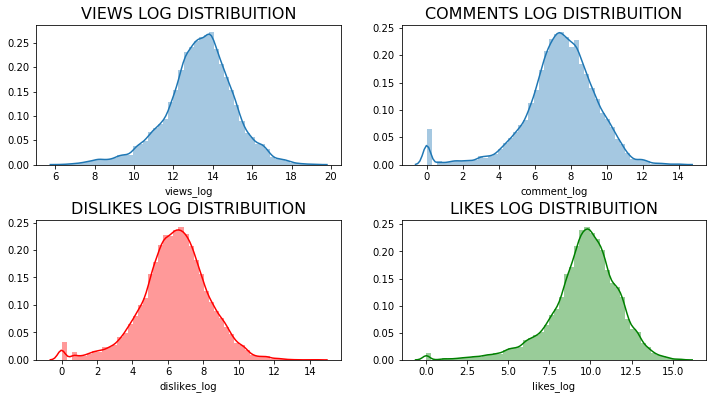

In [6]:
df_yout['likes_log'] = np.log(df_yout['likes'] + 1)
df_yout['views_log'] = np.log(df_yout['views'] + 1)
df_yout['dislikes_log'] = np.log(df_yout['dislikes'] + 1)
df_yout['comment_log'] = np.log(df_yout['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_yout['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

> Quantiles 

In [7]:
print("Views quantiles")
print(df_yout['views'].quantile([.01,.25,.5,.75,.99]))
print("")

print("Likes quantiles")
print(df_yout['likes'].quantile([.01,.25,.5,.75,.99]))
print("")

print("Dislikes quantiles")
print(df_yout['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")

print("Comment quantiles")
print(df_yout['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [8]:
df_yout['category_name'] = np.nan

df_yout.loc[(df_yout["category_id"] == 1),"category_name"] = 'Film and Animation'
df_yout.loc[(df_yout["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_yout.loc[(df_yout["category_id"] == 10),"category_name"] = 'Music'
df_yout.loc[(df_yout["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_yout.loc[(df_yout["category_id"] == 17),"category_name"] = 'Sport'
df_yout.loc[(df_yout["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yout.loc[(df_yout["category_id"] == 20),"category_name"] = 'Gaming'
df_yout.loc[(df_yout["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yout.loc[(df_yout["category_id"] == 23),"category_name"] = 'Comedy'
df_yout.loc[(df_yout["category_id"] == 24),"category_name"] = 'Entertainment'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News and Politics'
df_yout.loc[(df_yout["category_id"] == 26),"category_name"] = 'How to and Style'
df_yout.loc[(df_yout["category_id"] == 27),"category_name"] = 'Education'
df_yout.loc[(df_yout["category_id"] == 28),"category_name"] = 'Science and Technology'
df_yout.loc[(df_yout["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News & Politics'

* Looking the Views_Distribuition by Category_Name's.

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


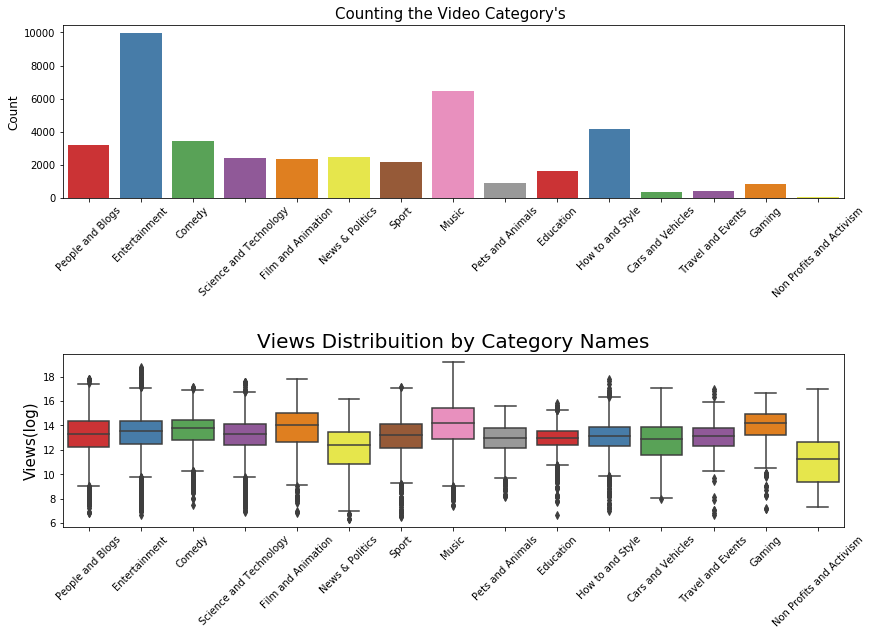

In [9]:
print("Category Name count")
print(df_yout.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

Significant number of politics and news videos.

The unique difference is in Non Profits and Activism videos that have less views than the "normal" videos

* Looking the Likes, Dislikes, Comments Distribuition by Category_Name's.

> Likes distribution by category's

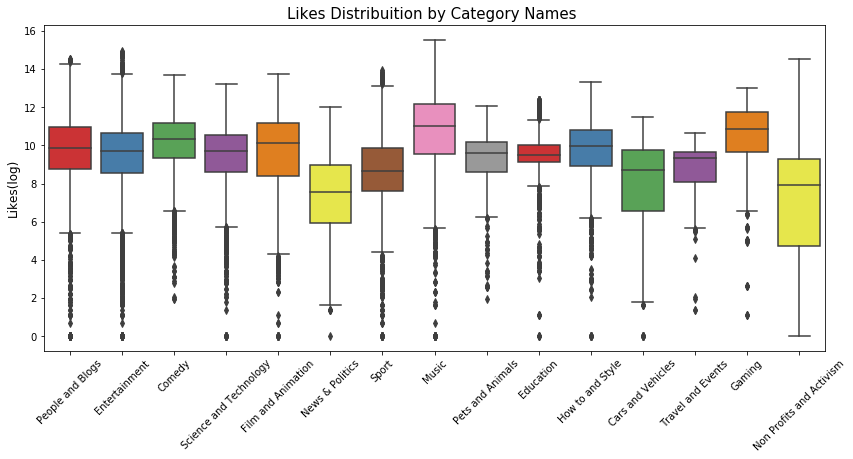

In [10]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

News and Politics have a the same of Non Profits of engagement likes

> Dislikes distribution by category's

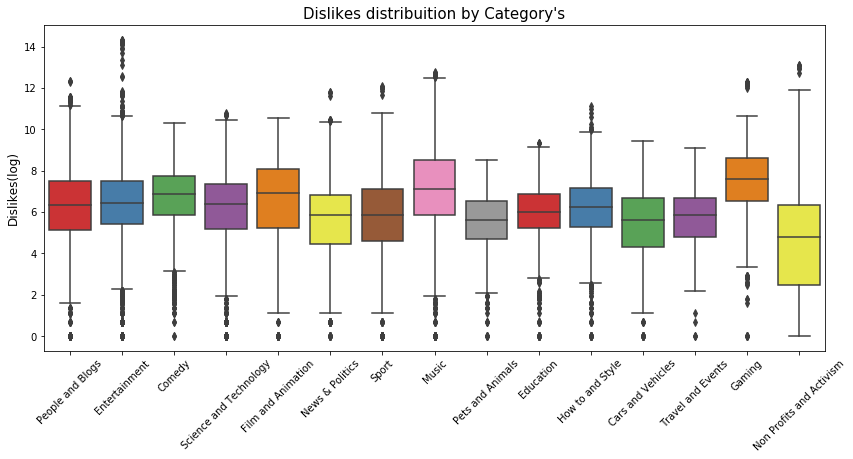

In [11]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

> Comments distribution by Category Names

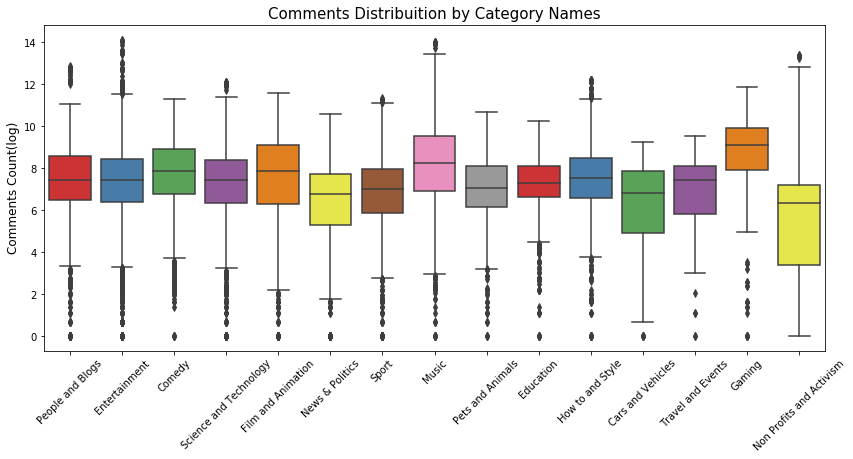

In [12]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

* Engagement Features

* We will create some new variables to us analyse the percent of likes, dislikes, comment by each category to discover what   category have the highest engagement.

In [14]:
df_yout['like_rate'] =  df_yout ['likes'] / df_yout['views'] * 100
df_yout['dislike_rate'] =  df_yout ['dislikes'] / df_yout['views'] * 100
df_yout['comment_rate'] =  df_yout ['comment_count'] / df_yout['views'] * 100

> Convert Rate Distribution

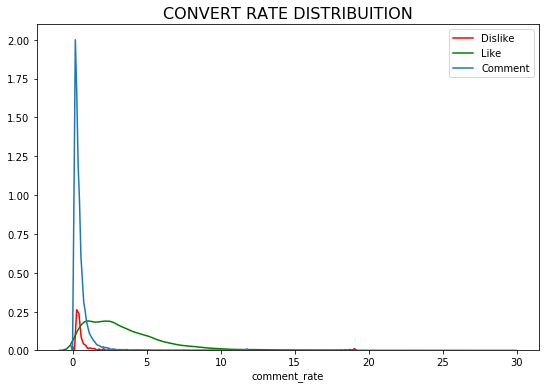

In [15]:
plt.figure(figsize = (9,6))
g1 = sns.distplot(df_yout['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df_yout['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df_yout['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

Very meaningful distribuition! Like x Dislikes rate have interesting differences.

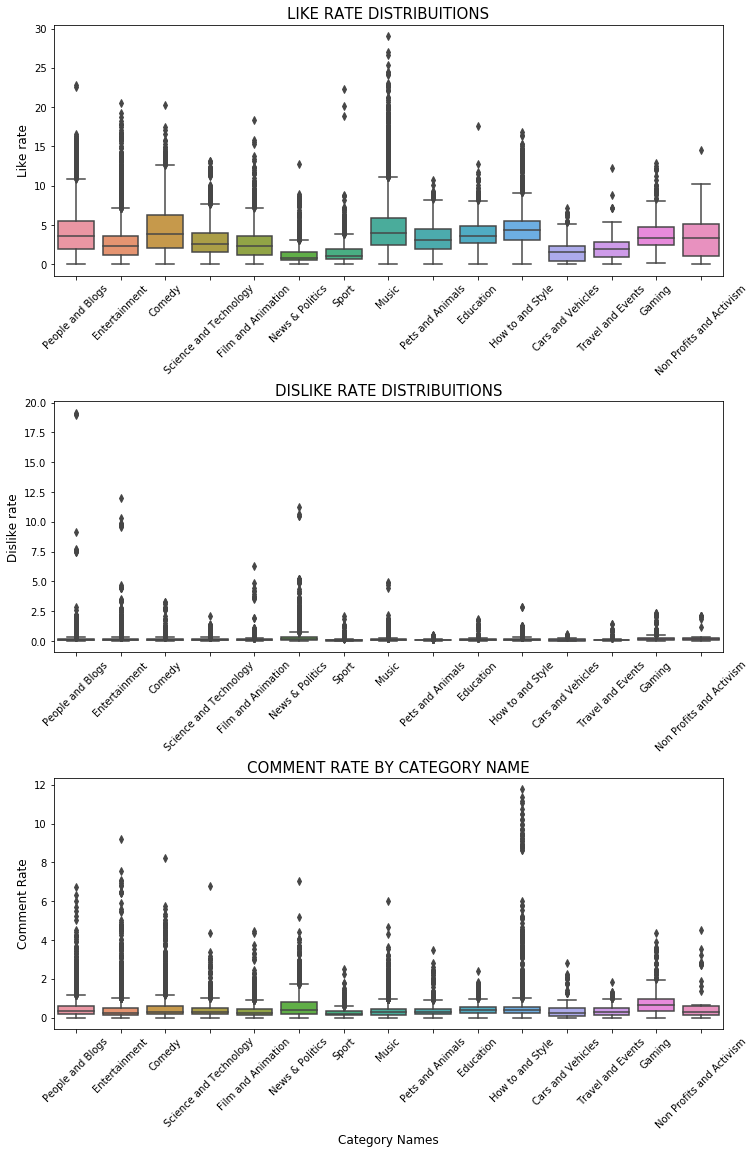

In [16]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=df_yout)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=df_yout)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=df_yout)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

We can see that the Dislike rate is very low in almost all categories but some outliers in 'People and Blogs' and News & Politics that we can might can consider "Normal"
The mean of like distribution is less than 5% but in music we have a very interesting pattern of like rate... The music category have the highest engagement rate.
And at the Comment rate we can see the how-to category with the highest rates of comments. Interesting because isn't politics LOL..

* Looking through the anothers Categoricals Variables.

> We have the variables : Comments Disable // Rating Disable // Video Error

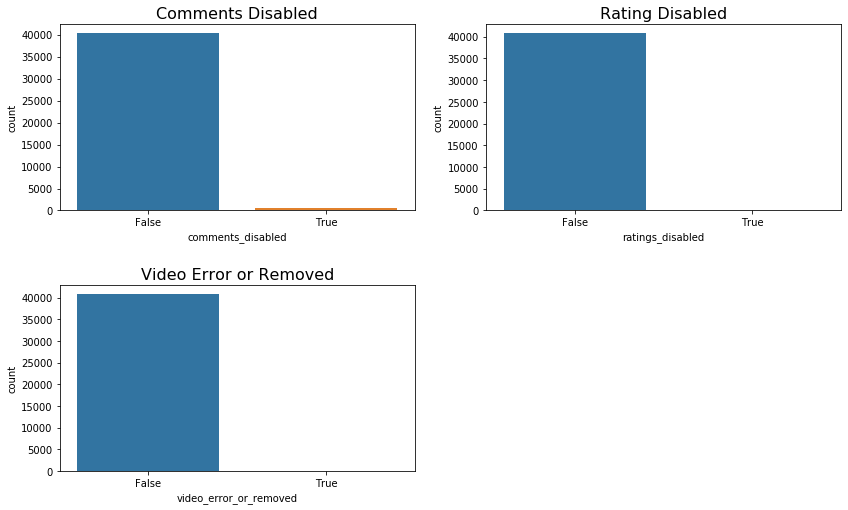

In [17]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df_yout)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df_yout)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df_yout)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

* Let's look the KDE( Kernal Density Estimation ) of this variables separated to deep understand them.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


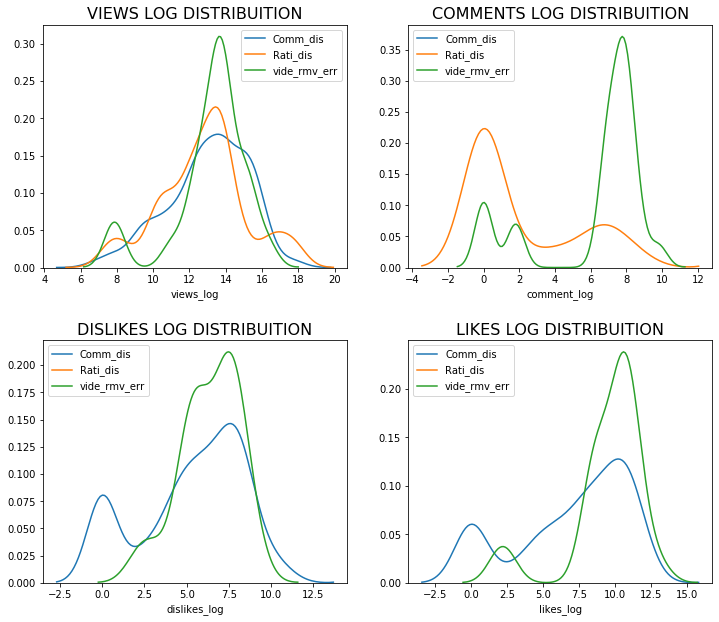

In [18]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['views_log'], 
                  hist=False, label='Comm_dis')
g1 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['views_log'], 
                  hist=False, label='Rati_dis')
g1 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['views_log'], 
                  hist=False, label='vide_rmv_err')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['comment_log'],
                  hist=False, label='Comm_dis')
g4 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['comment_log'], 
                  hist=False, label='Rati_dis')
g4 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['comment_log'], 
                  hist=False, label='vide_rmv_err')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yout[df_yout['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(df_yout[df_yout['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(df_yout[df_yout['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

Removed videos no have some views until be moreved... Rating disable and Comments disable have the same distribuition.

* Analysing the Correlation Matrix of the Numerical Variables.

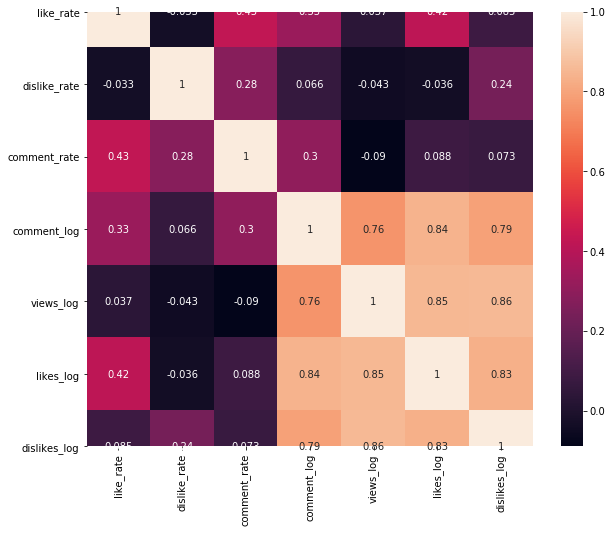

In [19]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(df_yout[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

* We will start creating some features from texts using Title and Tags columns.

In [20]:
# NLP ( Natural Language Processing )
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

In [21]:
#Setting the stopwords

eng_stopwords = set(stopwords.words("english"))

In [22]:
#Word count in each comment:

df_yout['count_word']=df_yout["title"].apply(lambda x: len(str(x).split()))
df_yout['count_word_tags']=df_yout["tags"].apply(lambda x: len(str(x).split()))

#Unique word count

df_yout['count_unique_word']=df_yout["title"].apply(lambda x: len(set(str(x).split())))
df_yout['count_unique_word_tags']=df_yout["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count

df_yout['count_letters']=df_yout["title"].apply(lambda x: len(str(x)))
df_yout['count_letters_tags']=df_yout["tags"].apply(lambda x: len(str(x)))

#punctuation count

df_yout["count_punctuations"] =df_yout["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_yout["count_punctuations_tags"] =df_yout["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count

df_yout["count_words_upper"] = df_yout["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_yout["count_words_upper_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count

df_yout["count_words_title"] = df_yout["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_yout["count_words_title_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords

df_yout["count_stopwords"] = df_yout["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_yout["count_stopwords_tags"] = df_yout["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words

df_yout["mean_word_len"] = df_yout["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_yout["mean_word_len_tags"] = df_yout["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [23]:
#derived features
#Word count percent in each comment:

df_yout['word_unique_percent']=df_yout['count_unique_word']*100/df_yout['count_word']
df_yout['word_unique_percent_tags']=df_yout['count_unique_word_tags']*100/df_yout['count_word_tags']

#Punct percent in each comment:

df_yout['punct_percent']=df_yout['count_punctuations']*100/df_yout['count_word']
df_yout['punct_percent_tags']=df_yout['count_punctuations_tags']*100/df_yout['count_word_tags']

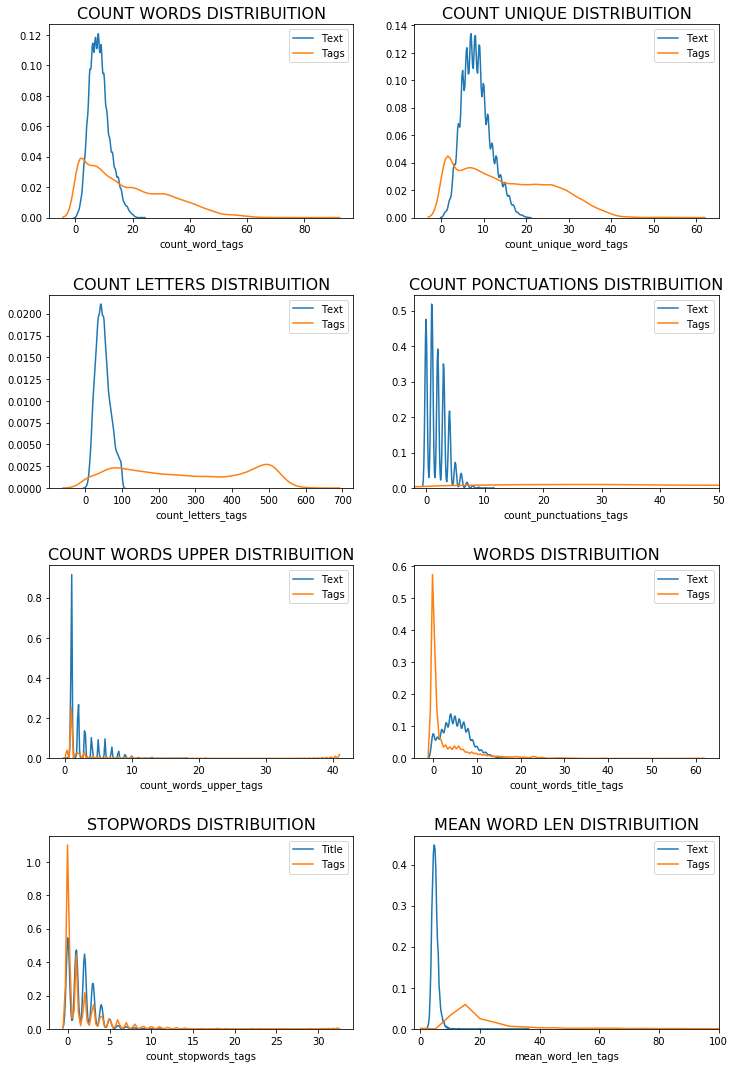

In [24]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_yout['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(df_yout['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df_yout['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df_yout['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df_yout['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(df_yout['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df_yout["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df_yout["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df_yout["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df_yout["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df_yout["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df_yout["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df_yout["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df_yout["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df_yout["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df_yout["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

* Have the Punctuations title and tags any Relation with Liews, Likes, Dislikes Comments?

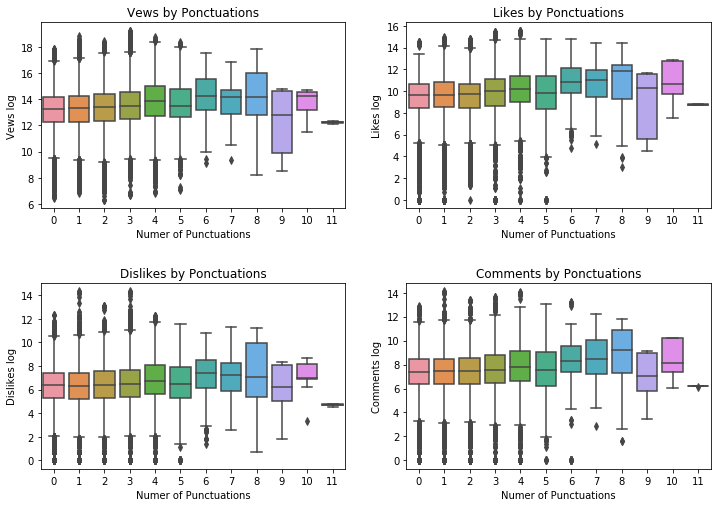

In [25]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='views_log',data=df_yout)
g.set_title("Vews by Ponctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='likes_log',data=df_yout)
g1.set_title("Likes by Ponctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='dislikes_log',data=df_yout)
g2.set_title("Dislikes by Ponctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='comment_log',data=df_yout)
g3.set_title("Comments by Ponctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

* The same view using Tags Punctuations values.

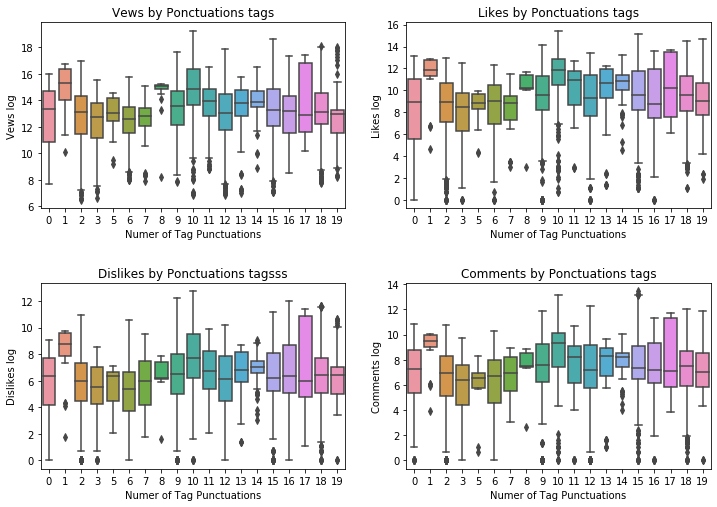

In [26]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations_tags', y='views_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g.set_title("Vews by Ponctuations tags")
g.set_xlabel("Numer of Tag Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations_tags', y='likes_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g1.set_title("Likes by Ponctuations tags")
g1.set_xlabel("Numer of Tag Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations_tags', y='dislikes_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g2.set_title("Dislikes by Ponctuations tagsss")
g2.set_xlabel("Numer of Tag Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations_tags', y='comment_log',data=df_yout[df_yout['count_punctuations_tags'] < 20])
g3.set_title("Comments by Ponctuations tags")
g3.set_xlabel("Numer of Tag Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

* Let's Verify the Correlation of Title and Tags Values with Views.

> exploring the Correlation matrix to see if have any interesting relation.

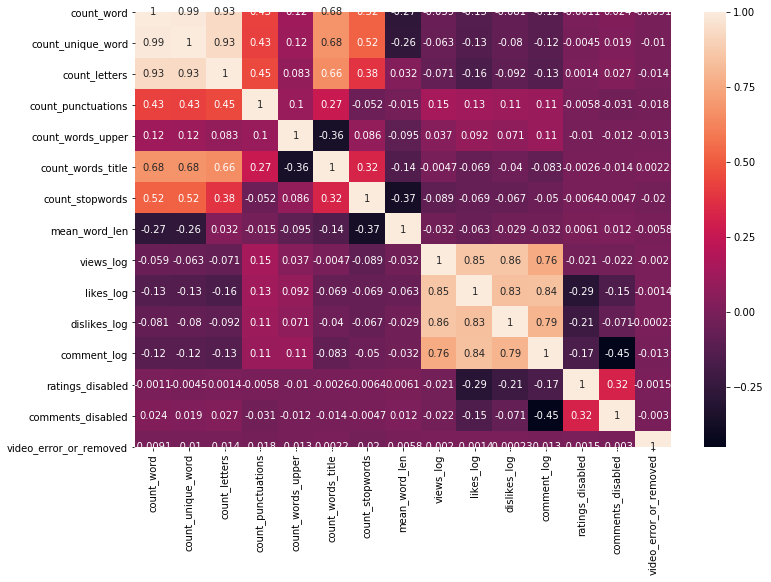

In [27]:
plt.figure(figsize = (12,8))

sns.heatmap(df_yout[['count_word', 'count_unique_word','count_letters',
                     "count_punctuations","count_words_upper", "count_words_title", 
                     "count_stopwords","mean_word_len", 
                     'views_log', 'likes_log','dislikes_log','comment_log',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot=True)
plt.show()

* Visualizing the Word Cloud of Tagged videos.

> Ratings Disable - Comments Disable - Video Error or Removed

In [28]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

> Rating Disabled

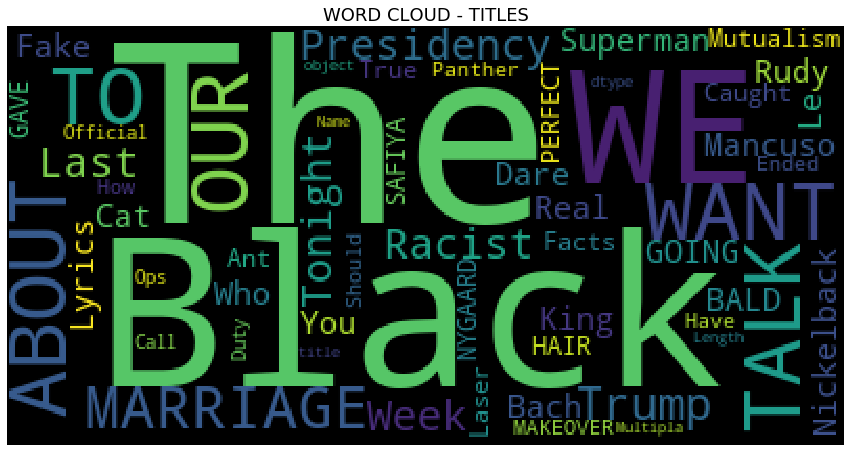

In [29]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

> Comments Disabled

* General Title Word Cloud.

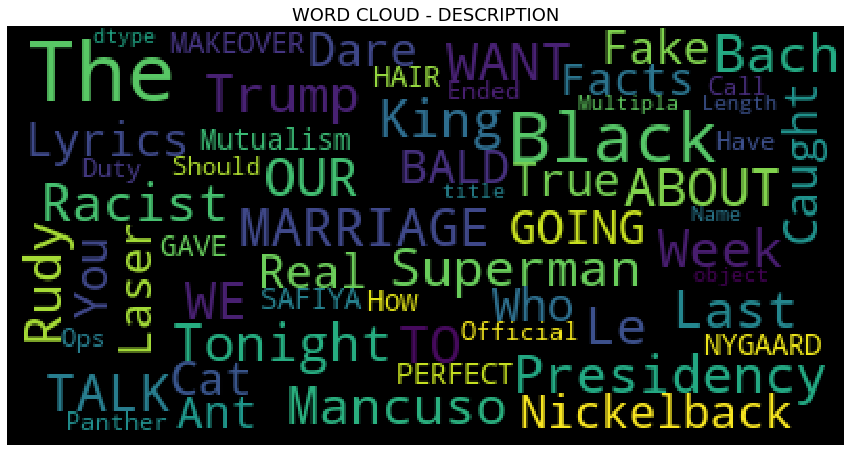

In [30]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_yout['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

* Visualizing the WordCloud of Description.

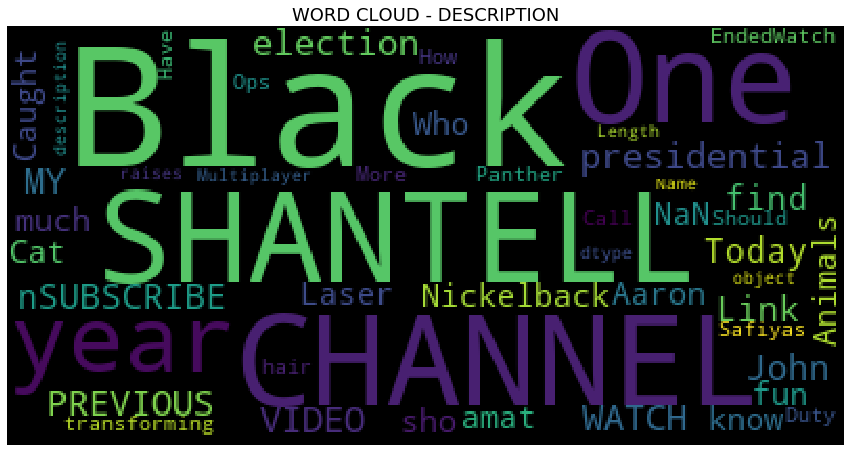

In [31]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df_yout['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()


* Analysing the Wordcloud of Tags.

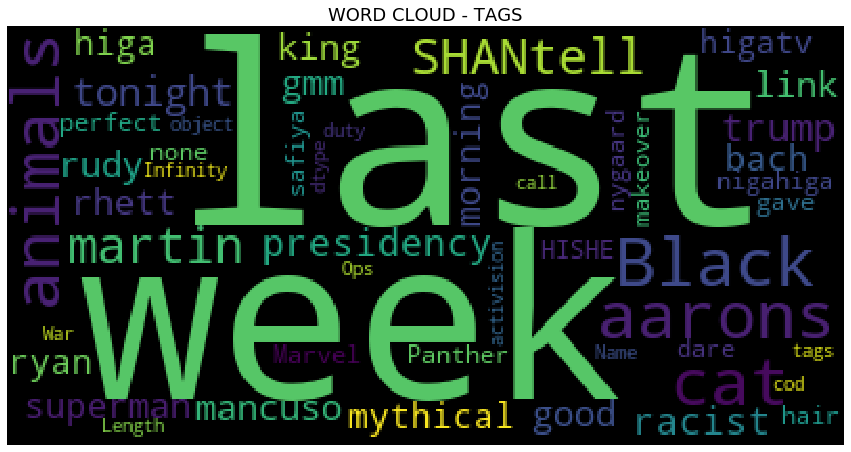

In [32]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_yout['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

In [33]:
df_yout['publish_time'] = pd.to_datetime(df_yout['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
5     6681
2     6207
12    6182
3     6175
1     5502
Name: month, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


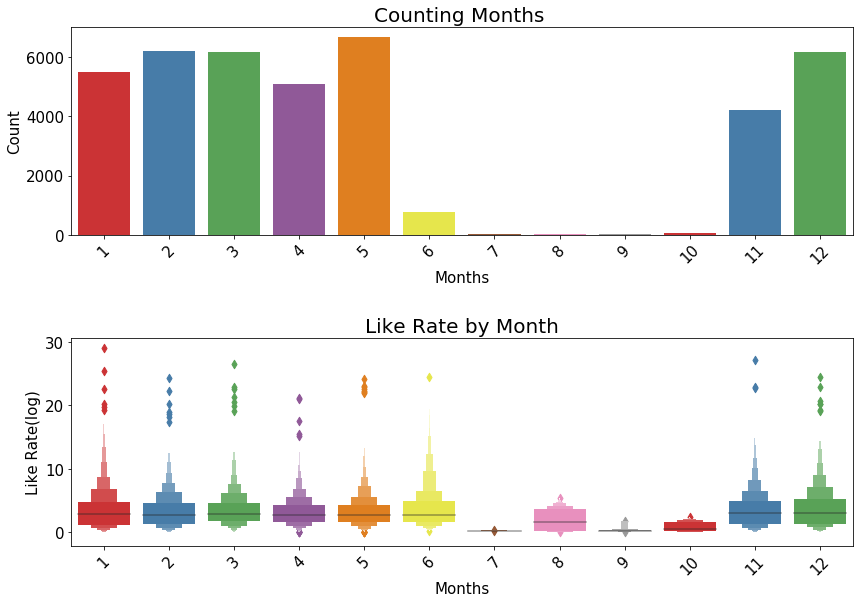

In [34]:
df_yout['month'] = df_yout['publish_time'].dt.month

print("Category Name count")
print(df_yout['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='month', y='like_rate', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

* Let's Extract the Hour value of Date_Time.

In [35]:
# separates date and time into two columns from 'publish_time' column

df_yout.insert(4, 'publish_date', df_yout['publish_time'].dt.date)
df_yout['publish_time'] = df_yout['publish_time'].dt.time
df_yout[['hour','min','sec']] = df_yout['publish_time'].astype(str).str.split(':', expand=True).astype(int)

* Knowning the Hour Feature.

TOP 5 Hour values
16    3669
15    3483
17    3447
18    2889
14    2807
Name: hour, dtype: int64


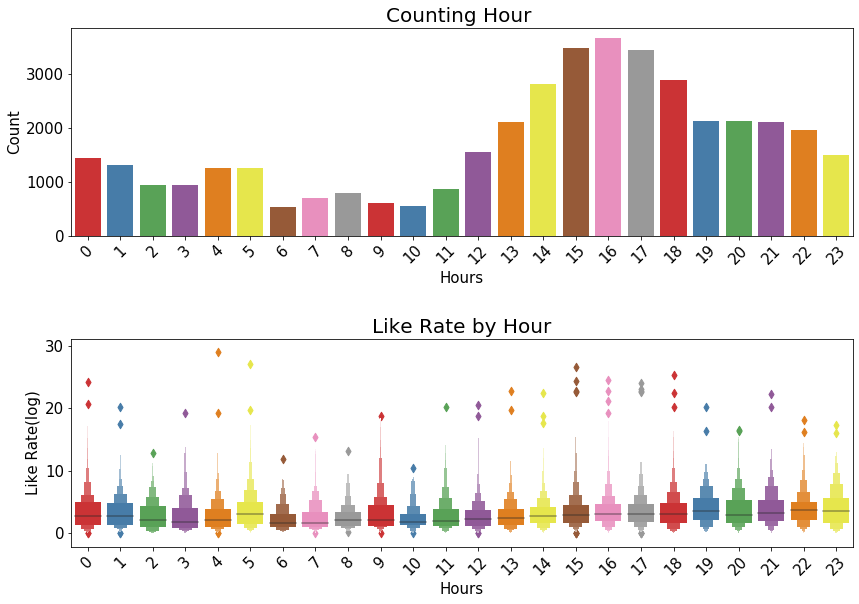

In [36]:
print("TOP 5 Hour values")
print(df_yout['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=df_yout, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='hour', y='like_rate', data=df_yout, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

Very interesting distribuition by hour.

# Kishan Rajput